## K-means Практика
 
- В ходе этого алгоритма все элементы пространства разбиваются на заранее известное (заданное) количество кластеров.
- Суть алгоритма состоит в том, что он пытается оптимизировать расстояние всех точек кластера от центра этого кластера.
- То есть он формирует кластеры так, чтобы внутри каждого сумма квадратов расстояний от точек до центра кластера была как можно меньше.

#### Схема действия алгоритма k-means

- Выбрать количество кластеров, которое нам кажется оптимальным.
- Выбрать случайным образом в пространство наших данных центроиды.
- Для каждой точки набора данных посчитать, к какому центроиду она ближе.
- Переместить каждый центроид в центр выборки, которую мы отнесли к этому центроиду. Каждый центроид на каждой итерации — вектор, элементы которого представляют собой средние значения признаков, вычисленные по всем записям кластера.
- Повторять шаги 3-4 фиксированное число раз или до тех пор, пока центроиды не сойдутся.

#### Недостатки:

- число кластеров надо знать заранее;
- алгоритм очень чувствителен к первичному выбору центроидов;
- не гарантирует достижение глобального минимума суммы квадратов расстояний, часто «застревает» в локальном минимуме.


У данного алгоритма есть также вариации, которые применяются в некоторых специфических случаях. Рассмотрим их ниже.

#### Mini-Batch K-means

- Используется в случае, если данных очень много. Из-за объема данных вычисление центров по всей выборке происходит долго. 
- Решение проблемы: на каждом шаге k-means работать с небольшой подвыборкой данных.
- В общем случае упрощённый алгоритм должен сходиться к тому же результату, что и на полной выборке. 
- Однако исследования показывают, что качества кластеров могут ухудшаться по сравнению с классическим k-means.

#### K-means++

- Ещё одну вариацию алгоритма k-means мы используем в том случае, если у нас очень много признаков.
- Как известно, результат и время работы k-means зависит от изначального выбора центров. Чтобы минимизировать затраты, мы будем действовать следующим образом:
- Первый центр выбираем случайно из равномерного распределения на выборке.
- Каждый следующий центр выбираем случайно из оставшихся точек так, чтобы вероятность выбрать каждую точку была пропорциональна квадрату расстояния от неё до ближайшего центра.



## Загружаем данные

In [1]:
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
# import seaborn as sns; sns.set(style='whitegrid')

np.random.seed(0)

# Количество объектов в каждом датасете
n_samples = 1500

# Вписанные круги
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
# Оставляем только признаки датасета, так как для кластеризации нам не нужны истинные классы объектов
X, y = noisy_circles
noisy_circles = X

# Полукруги
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
X, y = noisy_moons
noisy_moons = X

# Кластеры в форме круга
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
X, y = blobs
blobs = X

# Отсутствие кластерной структуры
no_structure = np.random.rand(n_samples, 2)

# Кластеры лентовидной формы    
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = X_aniso

# Кластеры в форме кругов с различной дисперсией
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)
X, y = varied
varied = X

## Обучаем Модель

Гиперпараметры модели

- `n_clusters` число кластеров которых мы ожидаем
- `init` способ инициализации
- `max_iter` максимальное количесво итерации 

In [8]:
from sklearn.cluster import KMeans

# k_means = KMeans(n_clusters=8,   
#                  init='k-means++', # 'k-means++', 'random', numpy.array # способ инициализации
#                  max_iter=300   # максимальное количесво итерации 
#                 )

Для обучения модели K-means необходимо вызвать метод fit, передав входным параметром признаки объектов датасета:

```python
kmeans_fit(X)
```

Обучив, мы можем получить центроиды кластеров:

```python
k_means.cluster_centers_
```

И узнать, в какой кластер попал каждый из объектов:

```python
k_means.labels_
```



## Применение Модели

Рассмотрим 6 разных типов данных, и как `k-means` справляется с ними

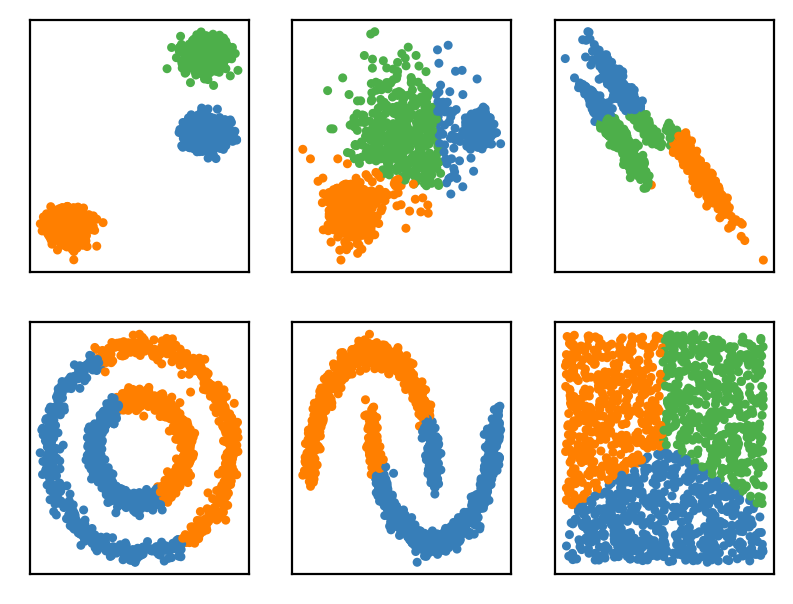

In [4]:
# создаём массив пар – датасета и соответствующих для него параметров алгоритма
datasets_params_list = [
    (blobs, {'n_clusters': 3}),
    (varied, {'n_clusters': 3}),
    (aniso, {'n_clusters': 3}),
    (noisy_circles, {'n_clusters': 2}),
    (noisy_moons, {'n_clusters': 2}),
    (no_structure, {'n_clusters': 3})]

for i, (X, k_means_params) in enumerate(datasets_params_list, start=1):
    X = StandardScaler().fit_transform(X)
    k_means = KMeans(n_clusters=k_means_params['n_clusters'])
    
    k_means.fit(X)
    y_pred = k_means.labels_.astype(np.int)

    plt.subplot(f'23{i}')
    plt.xticks([]); plt.yticks([])
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    plt.scatter(X[:, 0], X[:, 1], s=5,color=colors[y_pred])

# Задание

## Задание <span style='color:#686dec'>4.5.1</span> 

При каком значении параметра init при создании объекта K-means центроиды классов будут инициализированы случайным образом в пространстве объектов датасета?

Для выполнения задания необходимо ознакомится с документацией к реализации K-means в пакете scikit-learn.

In [9]:
models = KMeans(init='random')

## Задание <span style='color:#686dec'>4.5.2</span> 

Обучите модель K-means с параметрами `n_clusters=3` и `random_state=42` на признаках исходного датасета.

Какие центроиды будут у получившихся кластеров? Введите ответ в виде массива. Каждое число в ответе округлите до ближайшего целого. Для округления можно воспользоваться функцией numpy.round

In [3]:
# import numpy as np
# a = [0.4, 0.6, 1.7]
# print(np.round(a).astype(np.int))

[0 1 2]


In [11]:
model = KMeans(n_clusters=3,
                init='random',
                random_state=42)

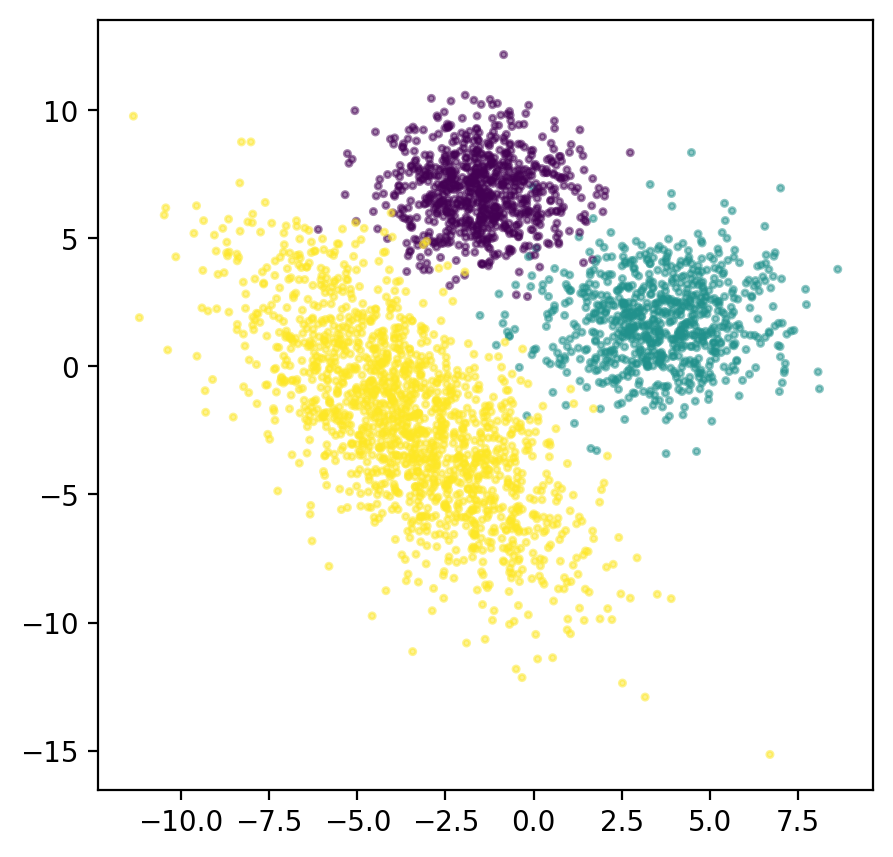

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

# Визуализируем исходные данные
plt.rcParams['figure.figsize'] = 5, 5
plt.scatter(X[:, 0], X[:, 1], s=5,c=y, alpha=0.5)
plt.show()

In [26]:
model.fit(X)
labels = model.labels_  # принадлежность классов
centroids = model.cluster_centers_
centroids

array([[-2.35624901,  6.26585521],
       [ 3.63560063,  1.74586847],
       [-3.20312056, -2.87616171]])

In [19]:
np.round(centroids).astype(int)

array([[-2,  6],
       [ 4,  2],
       [-3, -3]])

## Задание <span style='color:#686dec'>4.5.3</span>

- Подсчитайте количество элементов в каждом из получившихся кластеров. 
- Запишите в форму ниже три числа через пробел(без запятых!): количество элементов в кластере 0, в кластере 1 и в кластере 2.
- Записывайте строго в таком порядке.

Для подсчёта элементов в списке можно воспользоваться функцией `numpy.unique` с параметром `return_counts=True`

In [22]:
from collections import Counter

Counter(labels)

Counter({1: 741, 0: 933, 2: 1326})

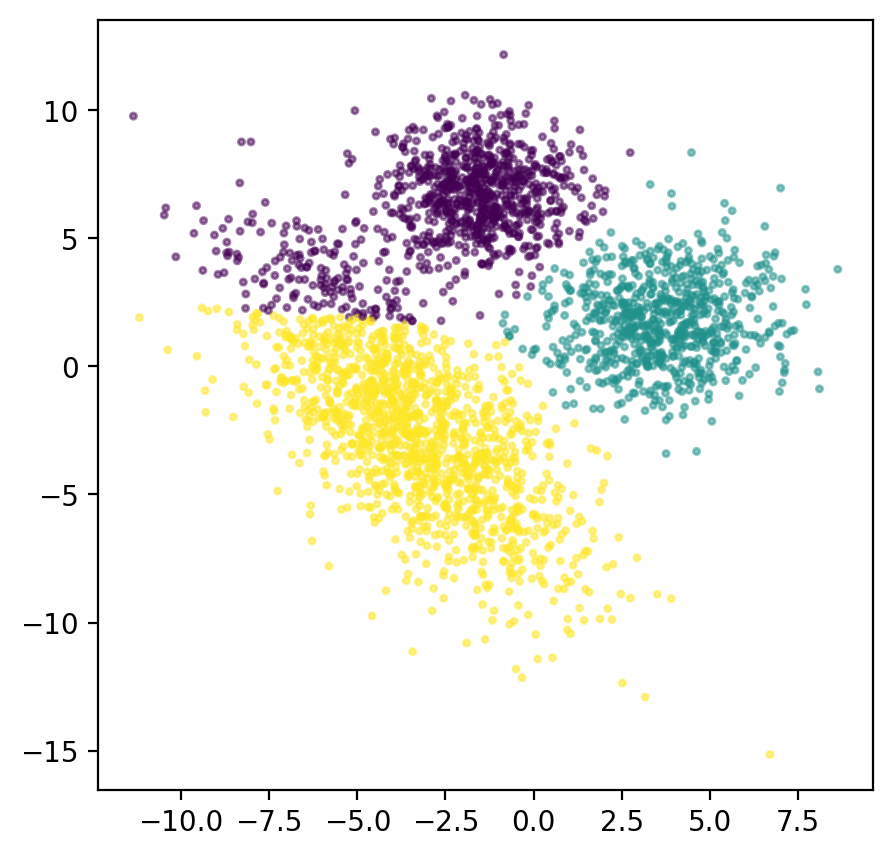

In [32]:
plt.rcParams['figure.figsize'] = 5, 5
plt.scatter(X[:, 0], X[:, 1], s=5,c=labels, alpha=0.5)
plt.show()